# Working with Pandas/Matplotlib/Seborn
# Project 3
## DS160-01
### AUTHOR: Naat Ambrosino
### VERSION: 1
### SEMESTER: Spring 2022
### SUMMARY:
#### I developed this notebook to complete individual project 3 of DS160, which will provide practice working with datasets and visualizing them in Python via Pandas/Mathplotlib/Seaborn

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## PART 1

### 1) You have been given four .csv files. Each file represents a different German power company’s wind turbine power generation data. Your first goal is to merge these datasets together. To do this, write a function that takes a filename (of and returns a dataframe. Your function should do the following:

#### a. Convert the Date column to a date (notice, the data are in d/m/y format – take that into consideration when you convert.)

#### b. Since none of the files have a column for company, you need to add one called Company that contains the Company name (you can extract this from .csv filename. Hint: dataframes have an insert function.)

##### Making the function.
##### Line 1) x is the input and thus the file name. For example, 'CompanyName.csv'
##### 2) getting the company name from the file name. Since the files are all named in the form CompanyName.csv, I define the slice of the screen that is all but the last four characters (eg, .csv) as coName (company name). I'll use this later.
##### 3) Using pandas to read the csv file and turn it into a dataframe, I arbitrarily name it df (I'll use df again later, but since this is just a local variable it doesn't matter.)
##### 4) Converting the Date column of the new data frame into date time. Because of the formatting they used in the csv file, I have to specify dayfirst=True so that the function knows 3/9/2019 is the third of September, not the ninth of March.
##### 5) Defining the (until now nonexistent) Company column of the dataframe as having the contents of the list, all of whose elements are the company name, and has as many elements as the dataframe has rows (to ensure the company name is attached to each row, and it doesn't have gaps or anything.) I used for i in index for this, so that it iterates through the index and I don't have to figure out the amount of data or whatever--- ie, for each index, there's an element of the list, which is always the company name, and the list's contents become the Company column's entries.
##### 6) Then the function returns the finished dataframe. I'll name these dfco, where co is the first two letters of each companys name. For example, the dataframe for Ambrion will be named dfam.

In [2]:
def retDF(x): #input, x, is file name
    coName=x[:-4] #grabbing company name from input by removing .csv
    df=pd.read_csv(x) #putting the contents of the file into a dataframe
    df.Date=pd.to_datetime(df.Date, dayfirst=True) #changing the date column of the dataframe to datetime format, specifying its originally in day first format
    df['Company']= list(coName for i in df.index) #making a new column that has the company name as its entry in every row
    return df

### 2) Execute your function four times, passing each file to it. Once complete, you will have four dataframes that you can merge.

In [3]:
dfam=retDF('Amprion.csv')

##### Making sure that dfam is a dataframe

In [4]:
type(dfam) #making sure its a dataframe

pandas.core.frame.DataFrame

##### Checking on dfam, especially that the company column's contents carried all the way through and that the dates look right.

In [5]:
dfam

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,Company
0,2019-08-23,5,5,6,7,6,5,5,5,5,...,69,66,67,66,69,68,65,61,64,Amprion
1,2019-08-24,62,60,55,55,54,52,51,50,49,...,33,31,31,31,31,31,31,27,28,Amprion
2,2019-08-25,29,29,29,30,28,27,28,26,22,...,27,28,28,25,23,21,19,16,15,Amprion
3,2019-08-26,13,12,12,11,12,12,12,10,10,...,22,22,22,23,23,24,25,24,23,Amprion
4,2019-08-27,21,20,19,16,15,14,13,11,11,...,33,31,31,31,33,33,34,33,32,Amprion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2020-09-18,116,117,117,113,114,114,111,114,114,...,116,112,108,104,99,96,96,92,92,Amprion
393,2020-09-19,91,92,91,92,92,90,90,90,93,...,58,58,58,58,58,57,58,58,60,Amprion
394,2020-09-20,60,59,58,55,52,50,48,45,43,...,50,47,46,45,45,44,46,46,45,Amprion
395,2020-09-21,44,44,40,39,37,36,34,33,31,...,12,12,12,12,11,11,12,12,11,Amprion


##### Checking that the data types of each column are correct, most specifically that the date column is in datetime. It is!

In [6]:
dfam.dtypes

Date        datetime64[ns]
00:00:00             int64
00:15:00             int64
00:30:00             int64
00:45:00             int64
                 ...      
23:00:00             int64
23:15:00             int64
23:30:00             int64
23:45:00             int64
Company             object
Length: 98, dtype: object

##### Now I'll go ahead and run the function for the rest of the files, since I know it worked out for Ambrion, I'll assume it'll go well for the rest.

In [7]:
dftr=retDF('TransnetBW.csv')
dfte=retDF('TenneTTSO.csv')
df50=retDF('50Hertz.csv')

### 3) Stack the dataframes on top of each to produce one large dataframe that has 98 columns, one for company, one for date and one for each timepoint.

##### I'll use the append function to stack them ontop of eachother, and I'll make sure to put the ignore_index parameter in each append function to True, or else I'll end up with an extra index column (or maybe even multiple.)

In [8]:
dfcombo=dfam.append(dftr,ignore_index=True).append(dfte,ignore_index=True).append(df50,ignore_index=True) #putting them all together

##### Checking that dfcombo looks right, especially that there's no duplicate columns or anything like that.

In [9]:
dfcombo #checking

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,Company
0,2019-08-23,5.0,5.0,6.0,7.0,6.0,5.0,5.0,5.0,5.0,...,69.0,66.0,67.0,66.0,69.0,68.0,65.0,61.0,64.0,Amprion
1,2019-08-24,62.0,60.0,55.0,55.0,54.0,52.0,51.0,50.0,49.0,...,33.0,31.0,31.0,31.0,31.0,31.0,31.0,27.0,28.0,Amprion
2,2019-08-25,29.0,29.0,29.0,30.0,28.0,27.0,28.0,26.0,22.0,...,27.0,28.0,28.0,25.0,23.0,21.0,19.0,16.0,15.0,Amprion
3,2019-08-26,13.0,12.0,12.0,11.0,12.0,12.0,12.0,10.0,10.0,...,22.0,22.0,22.0,23.0,23.0,24.0,25.0,24.0,23.0,Amprion
4,2019-08-27,21.0,20.0,19.0,16.0,15.0,14.0,13.0,11.0,11.0,...,33.0,31.0,31.0,31.0,33.0,33.0,34.0,33.0,32.0,Amprion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,2020-09-18,73.0,72.0,66.0,62.0,59.0,58.0,54.0,53.0,52.0,...,75.0,73.0,75.0,73.0,73.0,70.0,66.0,64.0,65.0,50Hertz
1584,2020-09-19,64.0,64.0,64.0,68.0,66.0,66.0,67.0,70.0,70.0,...,149.0,150.0,147.0,146.0,141.0,139.0,131.0,127.0,122.0,50Hertz
1585,2020-09-20,111.0,102.0,95.0,87.0,82.0,83.0,80.0,75.0,72.0,...,105.0,104.0,95.0,89.0,81.0,73.0,69.0,66.0,57.0,50Hertz
1586,2020-09-21,57.0,53.0,47.0,44.0,43.0,42.0,42.0,45.0,45.0,...,78.0,76.0,75.0,72.0,68.0,65.0,62.0,59.0,55.0,50Hertz


### 4) You are going to visualize aggregate data first. To start, you need to create a new dataframe that is grouped by Company and the year (e.g. 50Hertz 2019, 50Hertz 2020, etc.). You can group by multiple columns by putting the column list in []. Group by the mean() function. 

##### First I'll pull the year out of each entry in the Date column using datetime functionality, making that a series. That way I can use that to group the rest of the data by later.

In [10]:
ye=dfcombo.Date.dt.year

##### Now I'll use the groupby function, and group the mean values by the company name and the year, so those will become my indexes.

In [11]:
df=dfcombo.groupby([dfcombo.Company,ye]).mean() #grouping by company and the year series, so that those become our multiindex

##### Checking that df looks good, and it does!

In [12]:
df #checking, looks good

00:00:00    00:15:00    00:30:00    00:45:00    01:00:00  \
Company    Date                                                               
50Hertz    2019  143.320611  142.351145  142.366412  142.000000  141.900763   
           2020  141.894737  141.124060  140.936090  140.838346  140.281955   
Amprion    2019  106.992366  106.679389  106.091603  105.549618  108.083969   
           2020   93.751880   94.312030   94.424812   94.033835   93.657895   
TenneTTSO  2019  150.866183  150.450992  150.152901  149.611679  148.946412   
           2020  141.603835  141.457105  141.203120  141.206278  140.931617   
TransnetBW 2019   39.293740   39.462290   39.165191   39.138321   39.369084   
           2020   30.899023   30.604737   30.354023   29.871128   29.731955   

                   01:15:00    01:30:00    01:45:00    02:00:00    02:15:00  \
Company    Date                                                               
50Hertz    2019  141.381679  140.648855  140.923664  140.732824  140.458015   
           2020  140.037594  139.462406  139.112782  138.646617  138.560150   
Amprion    2019  108.282443  108.129771  107.465649  107.282443  106.671756   
           2020   93.563910   93.146617   92.812030   92.571429   92.127820   
TenneTTSO  2019  148.629847  148.808473  148.620382  148.236031  147.931298   
           2020  140.642105  140.583008  140.537632  140.579962  140.784511   
TransnetBW 2019   39.028779   38.834580   38.684504   38.211145   38.427099   
           2020   29.642481   29.409511   29.432857   29.453045   29.410301   

                 ...    21:30:00    21:45:00    22:00:00    22:15:00  \
Company    Date  ...                                                   
50Hertz    2019  ...  144.328244  144.839695  144.709924  144.641221   
           2020  ...  147.590226  147.214286  147.075188  146.661654   
Amprion    2019  ...  115.412214  114.572519  114.076336  112.961832   
           2020  ...   96.515038   96.338346   96.368421   96.379699   
TenneTTSO  2019  ...  152.761908  152.608015  152.675802  152.765115   
           2020  ...  145.523571  144.793947  144.206466  143.894850   
TransnetBW 2019  ...   38.739847   38.871527   38.754275   38.998473   
           2020  ...   31.489662   31.425075   31.569248   31.510526   

                   22:30:00    22:45:00    23:00:00    23:15:00    23:30:00  \
Company    Date                                                               
50Hertz    2019  144.442748  144.274809  144.954198  144.206107  144.076336   
           2020  145.609023  144.624060  143.864662  143.680451  143.112782   
Amprion    2019  112.595420  112.427481  111.343511  110.946565  110.328244   
           2020   96.176692   94.898496   95.018797   94.973684   94.691729   
TenneTTSO  2019  152.631374  152.897176  152.363740  152.357405  152.236565   
           2020  143.764248  143.694135  143.535902  142.563008  142.350075   
TransnetBW 2019   39.014733   39.522290   39.187099   39.421832   39.499924   
           2020   31.356391   31.330113   31.271917   30.962932   30.978346   

                   23:45:00  
Company    Date              
50Hertz    2019  144.259542  
           2020  142.338346  
Amprion    2019  107.473282  
           2020   94.383459  
TenneTTSO  2019  151.705496  
           2020  141.976128  
TransnetBW 2019   39.299924  
           2020   30.907481  

[8 rows x 96 columns]

### 5) The first plot you want to make is horizontal bar chart that shows the average amount of power generated by each company, in each year for midnight and another bar graph that shows the same for noon. To this:

#### a. Write the code to extract a dataframe for each time point (00:00:00 and 12:00:00) and put them in their own objects name midnight and noon. When you have done this you will have two Pandas Series that look like below.
#### b. Write the code to create a horizontal bar chart for each dataset that look the those below. Note: These are two separate charts, they are not subplots.
#### c. Save each chart separately (as two PNG files).

##### grabbing the values of the midnight column of the df dataframe and making it a series named midnight

In [13]:
midnight= df['00:00:00']

checking that it worked, it did

In [14]:
midnight #checking that the series looks how it should

Company     Date
50Hertz     2019    143.320611
            2020    141.894737
Amprion     2019    106.992366
            2020     93.751880
TenneTTSO   2019    150.866183
            2020    141.603835
TransnetBW  2019     39.293740
            2020     30.899023
Name: 00:00:00, dtype: float64

Doing the same with noon

In [15]:
noon= df['12:00:00'] #doing the same with noon

In [16]:
noon #Checking

Company     Date
50Hertz     2019    142.473282
            2020    163.398496
Amprion     2019    100.572519
            2020    101.357143
TenneTTSO   2019    149.229466
            2020    162.944436
TransnetBW  2019     37.772366
            2020     25.731053
Name: 12:00:00, dtype: float64

Making a horizontal bar plot, sorting values so they are in ascending order, titling it according to the example, then saving it as a png using plt.savefig. The x label would just not disappear, so I ended up setting the xlabel parameter to an empty string (leaving it blank or setting the parameter equal to None ended up with the chart having an unwanted 'Company,Date' label| on its vertical axis.) I left the color parameter unspecified as the example seems to be the default blue.

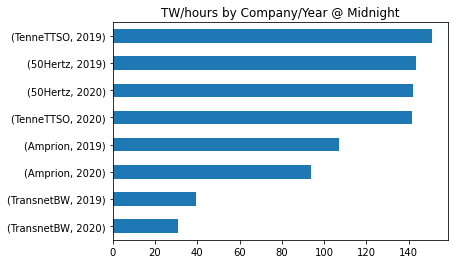

In [17]:
midnight.sort_values(ascending=True).plot(kind='barh',xlabel='', title='TW/hours by Company/Year @ Midnight')
plt.savefig('midnightbar.png')

Doing the same for noon, but also specifying the color parameter as red so it fits the example

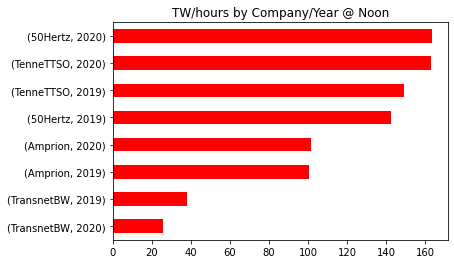

In [18]:
noon.sort_values(ascending=True).plot(kind='barh',xlabel='', title='TW/hours by Company/Year @ Noon',color='red')
plt.savefig('noonbar.png')

### 6) You have been asked to combine the two bar graphs into a single graph that shares the x-axis. And, it will be published in newspaper in grayscale, so the top graph should be silver and the bottom should be gray. Save the file as ‘combined_bar_chart.png’. The chart should appear as below

Doing so. Top line is creating the figure as a whole, second line is adding a subplot (211 meaning that the figure has 2 rows and 1 column of subplot, and this subplot should be in the first position), third line is defining the subplot and making it silver, repeat that with noon on fourth and fifth lines, then saving figure using same method as before.

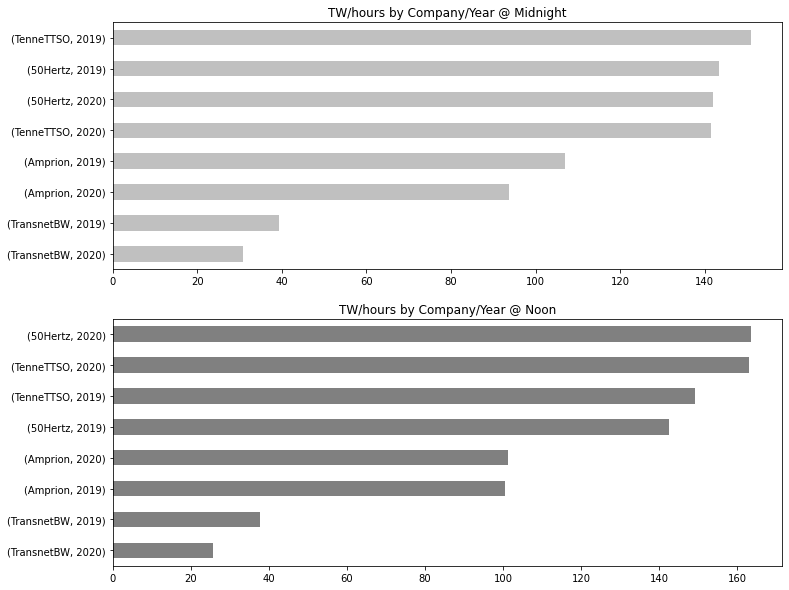

In [19]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(211)
ax1=midnight.sort_values(ascending=True).plot(kind='barh',xlabel='', title='TW/hours by Company/Year @ Midnight',color='silver')
ax2=fig.add_subplot(212)
ax2=noon.sort_values(ascending=True).plot(kind='barh',xlabel='', title='TW/hours by Company/Year @ Noon',color='gray')
plt.savefig('combined_bar_chart.png')

### 7) You have been asked to write a function that accepts the ungrouped dataframe, the company name, date, and a plotting color that generates an area graph for that particular company/day. Use this function signature: daily_view(dataframe, company, date, color). Your function should produce the following graph : [see pdf]

##### Line 1) Defining function, parameters are dataframe, company, date, and color, which defaults to blue.
##### 2) Making a variable called dateMod, which is the date input but in datetime format instead of a string.
##### 3) querying the dataframe with the condition that the entry of the company column is the company name, using @ infront of the company variable to specify its a variable
##### 4) doing the same thing with the date using the new dataframe
##### 5) dropping unnecessary columns
##### 6) transposing rows into columns and vica versa to make it plotable
##### 7) Plotting, using f strings for the title so that the title changes depending on input.

In [20]:
def daily_view(dataframe, company, date, color="blue"):
    dateMod=pd.to_datetime(date)
    coOnly=dataframe.query("Company==@company")
    coOnDate=coOnly.query("Date==@dateMod")
    withoutExtraColumns=coOnDate.drop(['Date','Company'],axis=1)
    plotReady=withoutExtraColumns.transpose()
    plotReady.plot(kind='area',xlabel='Time of Day',ylabel='TW/h Generated', title=f'Power Production: {company}/{date}',color=color,figsize=(12,6),legend=False)

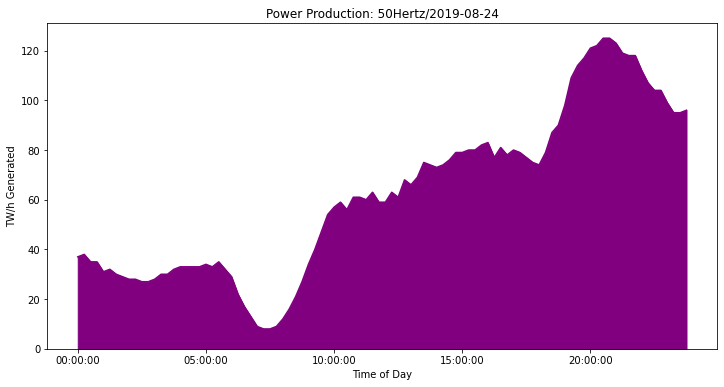

In [21]:
daily_view(dfcombo,'50Hertz','2019-08-24','purple') #testing, it works!

### BONUS (10 points): Generate a unified graph that contains four area charts, one for each company for the same day. See example below. Note: I won’t help with this since it is a bonus.

This function is pretty much the same as before, except date and dataframe are both given default values, it does not create a plot, and returns the dataframe from the step before plotting. Basically, it creates a dataframe that is ready to be plotted in the same format as before. I use this to speed up creating the dataframes for each of the subplots.

In [22]:
def dfprep(company,date='2019-08-24',dataframe=dfcombo):
    dateMod=pd.to_datetime(date)
    coOnly=dataframe.query("Company==@company")
    coOnDate=coOnly.query("Date==@dateMod")
    withoutExtraColumns=coOnDate.drop(['Date','Company'],axis=1)
    plotReady=withoutExtraColumns.transpose()
    return plotReady
re50=dfprep(company='50Hertz')

Testing the function with 50Hertz, and it worked.

In [23]:
re50 #testing, worked

,1192
00:00:00,37.0
00:15:00,38.0
00:30:00,35.0
00:45:00,35.0
01:00:00,31.0
...,...
22:45:00,104.0
23:00:00,99.0
23:15:00,95.0
23:30:00,95.0


Running the function on the rest of them, naming them each re and the first two letters of the company name

In [24]:
reAm=dfprep('Amprion')
reTe=dfprep('TenneTTSO')
reTr=dfprep('TransnetBW') #rest of them

Creating a multiaxis plot, with labels and titles and colors and values corresponding to the example given on the instruction sheet. Final line adds some padding between the graphs as they were all squished together without that line.

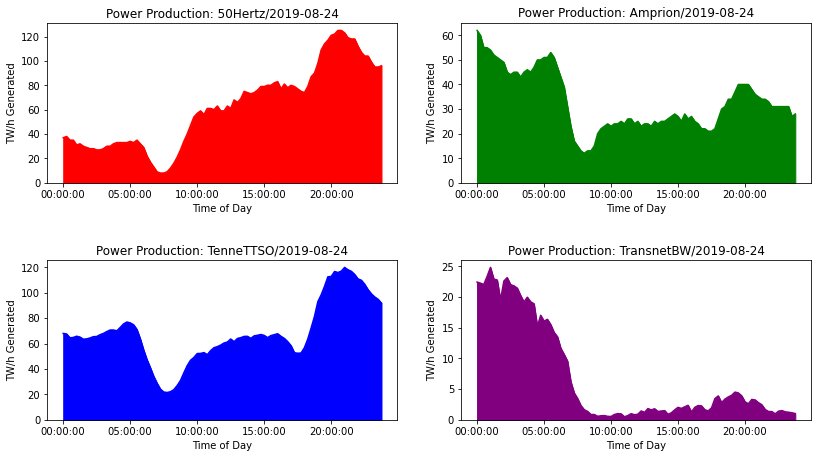

In [25]:
fig, axes = plt.subplots(2,2, figsize=(12,7))
re50.plot(kind='area',xlabel='Time of Day',ylabel='TW/h Generated', title=f'Power Production: 50Hertz/2019-08-24',color='red',legend=False,ax=axes[0,0])
reAm.plot(kind='area',xlabel='Time of Day',ylabel='TW/h Generated', title=f'Power Production: Amprion/2019-08-24',color='green',legend=False,ax=axes[0,1])
reTe.plot(kind='area',xlabel='Time of Day',ylabel='TW/h Generated', title=f'Power Production: TenneTTSO/2019-08-24',color='blue',legend=False,ax=axes[1,0])
reTr.plot(kind='area',xlabel='Time of Day',ylabel='TW/h Generated', title=f'Power Production: TransnetBW/2019-08-24',color='purple',legend=False,ax=axes[1,1])
fig.tight_layout(pad=3)

## PART 2
## In class we looked at several data sets provided by Seaborn including fmri, flights, and mpg. Using one or more of the other data sets besides (fmri, flights, mpg and penguin) generate examples of the following plots:
### 1. Line Chart


Looking at the different datasets to choose from

In [26]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Looking at diamonds and its data, then deciding to use that

In [27]:
dia=sns.load_dataset('diamonds')

In [28]:
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Dropping colummns I won't use and then checking whats left

In [29]:
dia1=dia.drop(['depth','table','x','y','z'],axis=1)

In [30]:
dia1

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757
53936,0.72,Good,D,SI1,2757
53937,0.70,Very Good,D,SI1,2757
53938,0.86,Premium,H,SI2,2757


Checking the count of each type of entry in the string columns, cut, color, clarity, to choose which ones to deal with

In [31]:
dia1.cut.groupby(dia1.cut).count()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [32]:
dia1.color.groupby(dia1.color).count()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: color, dtype: int64

In [33]:
dia1.clarity.groupby(dia1.clarity).count()

clarity
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
VS2     12258
SI1     13065
SI2      9194
I1        741
Name: clarity, dtype: int64

Chose to deal with only the most common color, G, and most common clarity, SI1. So, I query the dataframe by those two values to get rid of entries that are not G and SI1.

In [34]:
dia1.query("color=='G' and clarity=='SI1'",inplace=True)

In [35]:
dia1

,carat,cut,color,clarity,price
67,0.31,Very Good,G,SI1,553
68,0.31,Premium,G,SI1,553
102,0.74,Ideal,G,SI1,2760
105,0.75,Ideal,G,SI1,2760
106,0.80,Premium,G,SI1,2760
...,...,...,...,...,...
53774,0.79,Good,G,SI1,2726
53808,0.81,Very Good,G,SI1,2733
53839,0.71,Ideal,G,SI1,2738
53870,0.70,Ideal,G,SI1,2744


Made a function to make prepping the dataframes for plotting easier. Decided I would make a line graph, with one line for each type of cut. The problem was, there were many entries with the same carrat but different price (such as above, index 53839 and 53894.) So, I decided that I would, for each cut, take the mean price for each carat value using the groupby().mean() combination. It then makes the index of the dataframe the carat values, as theres only one mean price per carat. Then the function outputs a dataframe that is ready to be put on a linegraph. I ran this function for each type of cut.

In [36]:
def avgPByCaratByCut(cuts):
    temp1=dia1.query("cut==@cuts")
    temp2=temp1.price.groupby(temp1.carat).mean()
    temp3=temp2.to_frame()
    temp3 = temp3.sort_values(by='carat')
    return temp3
ideal=avgPByCaratByCut(cuts='Ideal') 
prem=avgPByCaratByCut('Premium')
very=avgPByCaratByCut('Very Good')
good=avgPByCaratByCut('Good')
fair=avgPByCaratByCut('Fair')
ideal.sample()

,price
carat,
0.72,2635.625


Plotting each of the dataframes, using plt.plot(dataframe.column). Also labeled and titled it accordingly.

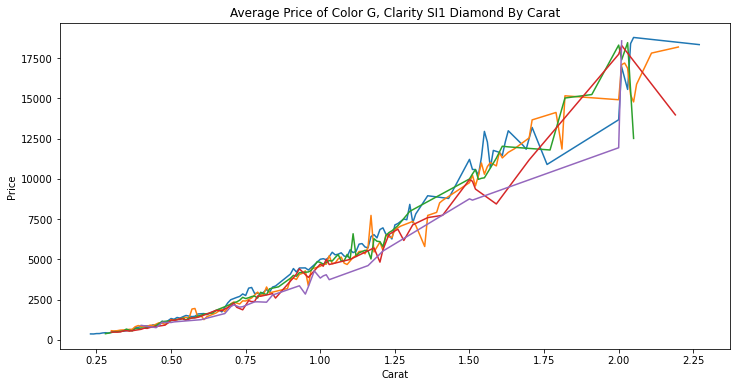

In [37]:
fig = plt.figure(figsize=(12,6))
plt.plot(ideal.price) 
plt.title('Average Price of Color G, Clarity SI1 Diamond By Carat') #titling.
plt.xlabel('Carat') #labeling
plt.ylabel('Price')#labeling
plt.plot(prem.price)
plt.plot(very.price)
plt.plot(good.price)
plt.plot(fair.price)

The same as above, but only for the ideal cut diamonds.

Text(0, 0.5, 'Price')

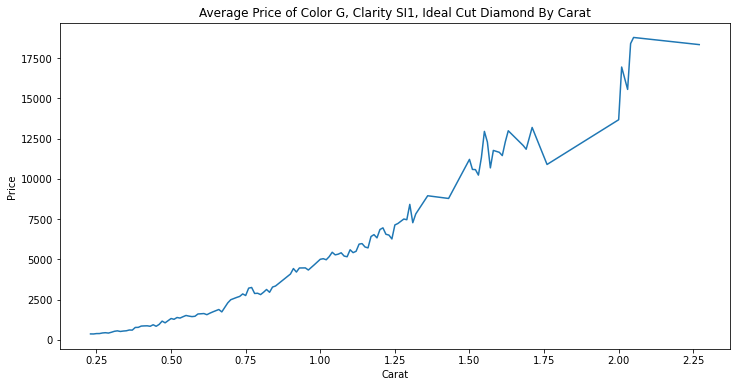

In [38]:
fig = plt.figure(figsize=(12,6))
plt.plot(ideal.price) 
plt.title('Average Price of Color G, Clarity SI1, Ideal Cut Diamond By Carat') #titling.
plt.xlabel('Carat') #labeling
plt.ylabel('Price')#labeling

### 2. Box/Whisker

Box/whisker plot of the distribution of carat values in the original diamond dataframe. Dots signify outliars. This means the data has a significant skew to the higher values.

{'whiskers': [<matplotlib.lines.Line2D at 0x24b2b08f2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24b2b05acd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b2b08ce80>],
 'medians': [<matplotlib.lines.Line2D at 0x24b2b193d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b2b19a520>],
 'means': []}

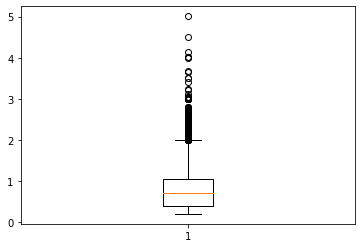

In [39]:
plt.boxplot(dia.carat) #with outliers being dots

The same as above, but the whis=(0,100) means the whiskers represent the 0th and 100th percentile, ie, the whiskers represent the full range of values.

{'whiskers': [<matplotlib.lines.Line2D at 0x24b2b012730>,
 'caps': [<matplotlib.lines.Line2D at 0x24b2afd5160>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b2b012fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x24b2afd5e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b2afd50a0>],
 'means': []}

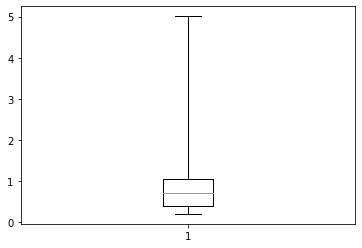

In [40]:
plt.boxplot(dia.carat,whis=(0,100)) #with the whiskers representing the full range of values

Making grouped box plots, with whiskers representing the full range of values, of price by different categories, cut, clarity, and color.

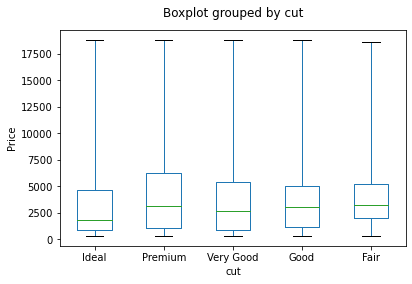

In [41]:
ax1 = dia.boxplot(column='price', by='cut',whis=(0,100)) 
ax1.set_title('')
ax1.set_ylabel('Price')
ax1.grid(False)

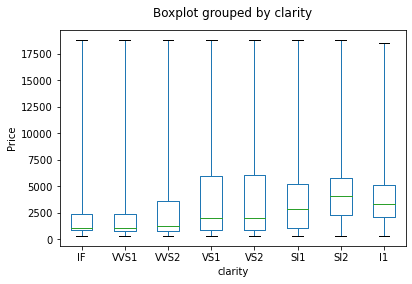

In [42]:
ax1 = dia.boxplot(column='price', by='clarity',whis=(0,100))
ax1.set_title('')
ax1.set_ylabel('Price')
ax1.grid(False)

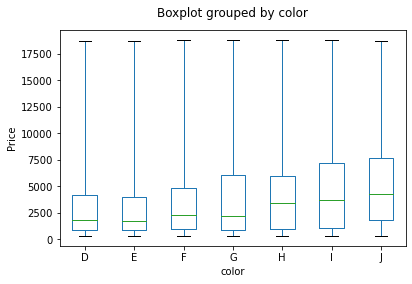

In [43]:
ax1 = dia.boxplot(column='price', by='color',whis=(0,100)) 
ax1.set_title('')
ax1.set_ylabel('Price')
ax1.grid(False)

###  Histograms and Kernel Density

Creating a histogram of the distribution of price of the ideal, G, S1I diamonds.

(array([27., 15., 12.,  5.,  7., 15.,  8.,  7.,  2.,  2.,  1.,  6.,  7.,
         3.,  1.,  0.,  1.,  0.,  1.,  3.]),
 array([  364.  ,  1285.15,  2206.3 ,  3127.45,  4048.6 ,  4969.75,
         5890.9 ,  6812.05,  7733.2 ,  8654.35,  9575.5 , 10496.65,
        11417.8 , 12338.95, 13260.1 , 14181.25, 15102.4 , 16023.55,
        16944.7 , 17865.85, 18787.  ]),
 <BarContainer object of 20 artists>)

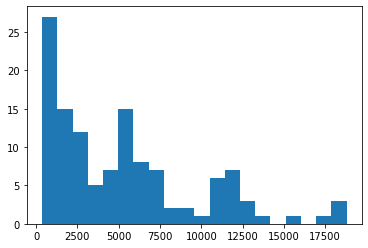

In [44]:
plt.hist(ideal.price, bins=20)

Creating a histogram of the price of all diamonds in the original dataframe, then for carats.

(array([6787., 8995., 3996., 2767., 2790., 2467., 2143., 1651., 1497.,
        1570., 1815., 1780., 1480., 1268., 1050.,  935.,  897.,  750.,
         662.,  634.,  541.,  442.,  495.,  456.,  430.,  368.,  358.,
         337.,  339.,  343.,  283.,  254.,  260.,  271.,  238.,  219.,
         213.,  202.,  200.,  168.,  184.,  185.,  169.,  163.,  162.,
         173.,  134.,  148.,  151.,  120.]),
 array([  326.  ,   695.94,  1065.88,  1435.82,  1805.76,  2175.7 ,
         2545.64,  2915.58,  3285.52,  3655.46,  4025.4 ,  4395.34,
         4765.28,  5135.22,  5505.16,  5875.1 ,  6245.04,  6614.98,
         6984.92,  7354.86,  7724.8 ,  8094.74,  8464.68,  8834.62,
         9204.56,  9574.5 ,  9944.44, 10314.38, 10684.32, 11054.26,
        11424.2 , 11794.14, 12164.08, 12534.02, 12903.96, 13273.9 ,
        13643.84, 14013.78, 14383.72, 14753.66, 15123.6 , 15493.54,
        15863.48, 16233.42, 16603.36, 16973.3 , 17343.24, 17713.18,
        18083.12, 18453.06, 18823.  ]),
 <BarContainer o

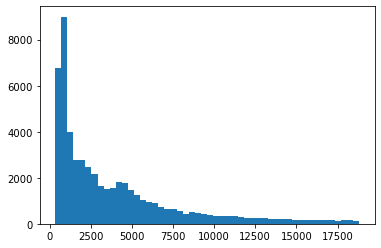

In [45]:
plt.hist(dia.price, bins=50)

(array([1.7179e+04, 7.9760e+03, 9.2430e+03, 9.3830e+03, 3.7500e+03,
        3.3790e+03, 8.2300e+02, 1.5260e+03, 4.5900e+02, 1.5500e+02,
        2.7000e+01, 2.6000e+01, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.2   , 0.4405, 0.681 , 0.9215, 1.162 , 1.4025, 1.643 , 1.8835,
        2.124 , 2.3645, 2.605 , 2.8455, 3.086 , 3.3265, 3.567 , 3.8075,
        4.048 , 4.2885, 4.529 , 4.7695, 5.01  ]),
 <BarContainer object of 20 artists>)

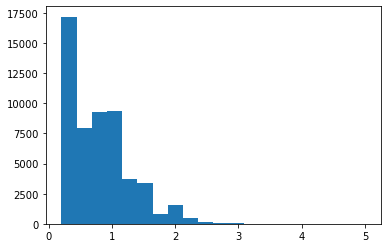

In [46]:
plt.hist(dia.carat, bins=20)

Creating two with kernal density plots, one just with the KDE and the other that is a histogram with the KDE superimposed over it.

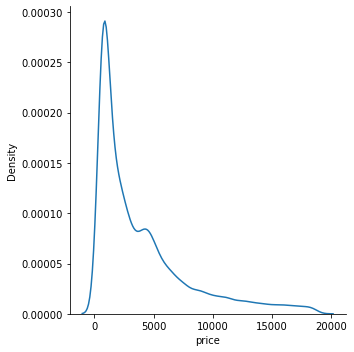

In [47]:
sns.displot(dia.price, kind='kde')

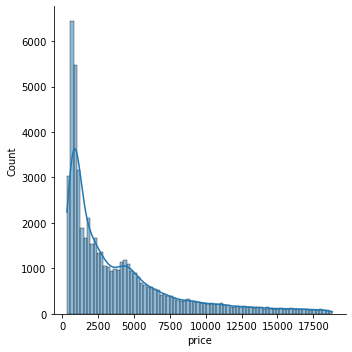

In [48]:
sns.displot(dia.price, kde=True)

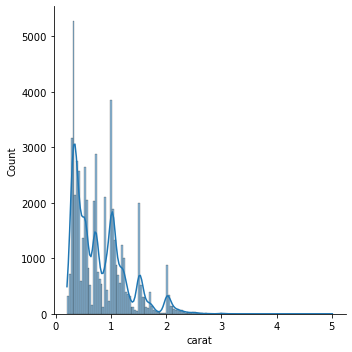

In [49]:
sns.displot(dia.carat, kde=True)

### 4. Heatmap

Looking at datasets, choosing one, and looking at its data. I decide to make heatplots representing number of survivors and average fare by class/sex and age range.

In [50]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [51]:
tita=sns.load_dataset('titanic')

In [52]:
tita.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
577,1,1,female,39.0,1,0,55.9000,S,First,woman,False,E,Southampton,yes,False
697,1,3,female,NaN,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True
290,1,1,female,26.0,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True
473,1,2,female,23.0,0,0,13.7917,C,Second,woman,False,D,Cherbourg,yes,True
208,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


Checking the amount in each class to make sure I shouldn't just use one or ignore one.

In [53]:
tita['class'].groupby(tita['class']).count()

class
First     216
Second    184
Third     491
Name: class, dtype: int64

Creating a column that has the class of the passenger and their sex, as I'll need those combined to have them as a single axis for the heatmaps.

In [54]:
tita['class_sex']=list(str(tita['class'][n])+' class '+str(tita['sex'][n]) for n in tita.index)
#combining class and sex columns

In [55]:
tita.sample(5) #worked

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_sex
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False,Second class female
585,1,1,female,18.0,0,2,79.6500,S,First,woman,False,E,Southampton,yes,False,First class female
506,1,2,female,33.0,0,2,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,Second class female
144,0,2,male,18.0,0,0,11.5000,S,Second,man,True,NaN,Southampton,no,True,Second class male
710,1,1,female,24.0,0,0,49.5042,C,First,woman,False,C,Cherbourg,yes,True,First class female


Dropping columns I don't need.

In [56]:
tita.drop(['pclass','sibsp','parch','embarked','adult_male','deck','embark_town'],inplace=True, axis=1)
#dropping unwanted columns

In [57]:
tita.sample(5) #checking if above worked

,survived,sex,age,fare,class,who,alive,alone,class_sex
168,0,male,NaN,25.9250,First,man,no,True,First class male
540,1,female,36.0,71.0000,First,woman,yes,False,First class female
285,0,male,33.0,8.6625,Third,man,no,True,Third class male
272,1,female,41.0,19.5000,Second,woman,yes,False,Second class female
103,0,male,33.0,8.6542,Third,man,no,True,Third class male


Reordering columns for convenience's sake.

In [58]:
tita.columns #getting column list for reordering

Index(['survived', 'sex', 'age', 'fare', 'class', 'who', 'alive', 'alone',
       'class_sex'],
      dtype='object')

In [59]:
tita=tita[['class_sex','age','survived', 'fare','sex', 'class', 'who', 'alive', 'alone']]
#reordering columns

In [60]:
tita.sample(5) #making sure reordering worked

,class_sex,age,survived,fare,sex,class,who,alive,alone
527,First class male,NaN,0,221.7792,male,First,man,no,True
23,First class male,28.00,1,35.5000,male,First,man,yes,True
803,Third class male,0.42,1,8.5167,male,Third,child,yes,False
219,Second class male,30.00,0,10.5000,male,Second,man,no,True
684,Second class male,60.00,0,39.0000,male,Second,man,no,False


Once, when I ran the above line sampling the data, I noticed some NaN entries in the age column, which would cause some problems since thats one of the things I want to use as an axis of the heatmap. So, I'm going to get rid of those, and check theres no other NaN values in other columns.

In [61]:
tita = tita[tita.age.notna()] #noticed some age=NaN entries, removing those

In [62]:
tita

,class_sex,age,survived,fare,sex,class,who,alive,alone
0,Third class male,22.0,0,7.2500,male,Third,man,no,False
1,First class female,38.0,1,71.2833,female,First,woman,yes,False
2,Third class female,26.0,1,7.9250,female,Third,woman,yes,True
3,First class female,35.0,1,53.1000,female,First,woman,yes,False
4,Third class male,35.0,0,8.0500,male,Third,man,no,True
...,...,...,...,...,...,...,...,...,...
885,Third class female,39.0,0,29.1250,female,Third,woman,no,False
886,Second class male,27.0,0,13.0000,male,Second,man,no,True
887,First class female,19.0,1,30.0000,female,First,woman,yes,True
889,First class male,26.0,1,30.0000,male,First,man,yes,True


In [63]:
tita.info() #checking there are no more NaN entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   class_sex  714 non-null    object  
 1   age        714 non-null    float64 
 2   survived   714 non-null    int64   
 3   fare       714 non-null    float64 
 4   sex        714 non-null    object  
 5   class      714 non-null    category
 6   who        714 non-null    object  
 7   alive      714 non-null    object  
 8   alone      714 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(1), object(4)
memory usage: 46.1+ KB


checking how many people are under each age, and realizing even rounding wouldn't help make sure there were enough people of each age to make the heatplot theasible. Theres just too few for each age, especially on outer edges. So I decide to make an age range column to use for the heatplot instead of the actual numerical values.


In [64]:
tita.age.groupby(tita.age).count() 
#checking how many people are under each age, and realizing even rounding wouldn't help
#theres just too few for each, especially on outer edges
#so I'll make an age range column

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age, Length: 88, dtype: int64

Making a simple if/elif/else function to sort the age values into ranges so I don't have to do that manually.

In [65]:
def agran(x): #making a function in order to make an age range column
    if x>=60:
        return '60+'
    elif x>=50:
        return '50-59'
    elif x>=40:
        return '40-49'
    elif x>=30:
        return '30-39'
    elif x>=25:
        return '25-29'
    elif x>=20:
        return '20-24'
    elif x>=15:
        return '15-19'
    elif x>=10:
        return '10-14'
    else:
        return '00-09'

Mapping the age columns values through the function and defining the outputs as an age range column.

In [66]:
tita['age_range']=list(map(lambda x: agran(x), tita['age']))
#making age range column

In [67]:
tita

,class_sex,age,survived,fare,sex,class,who,alive,alone,age_range
0,Third class male,22.0,0,7.2500,male,Third,man,no,False,20-24
1,First class female,38.0,1,71.2833,female,First,woman,yes,False,30-39
2,Third class female,26.0,1,7.9250,female,Third,woman,yes,True,25-29
3,First class female,35.0,1,53.1000,female,First,woman,yes,False,30-39
4,Third class male,35.0,0,8.0500,male,Third,man,no,True,30-39
...,...,...,...,...,...,...,...,...,...,...
885,Third class female,39.0,0,29.1250,female,Third,woman,no,False,30-39
886,Second class male,27.0,0,13.0000,male,Second,man,no,True,25-29
887,First class female,19.0,1,30.0000,female,First,woman,yes,True,15-19
889,First class male,26.0,1,30.0000,male,First,man,yes,True,25-29


Grouping the number of survivors per their class/sex and age range, using groupby().count. Returns a series, I convert it to a dataframe, then check it, and everything looks good.

In [68]:
tita2=tita['survived'].groupby([tita.class_sex,tita.age_range]).sum()
#counting amount of each group who survived

In [69]:
tita2=tita2.to_frame()

In [70]:
tita2.head()

survived
class_sex          age_range          
First class female 00-09             0
                   10-14             1
                   15-19            12
                   20-24            13
                   25-29             2

In [71]:
tita3= tita.sort_values(by='age') 

In [72]:
tita3 #checking to make sure the sum function did what I wanted it to do
#looks about right

,class_sex,age,survived,fare,sex,class,who,alive,alone,age_range
803,Third class male,0.42,1,8.5167,male,Third,child,yes,False,00-09
755,Second class male,0.67,1,14.5000,male,Second,child,yes,False,00-09
644,Third class female,0.75,1,19.2583,female,Third,child,yes,False,00-09
469,Third class female,0.75,1,19.2583,female,Third,child,yes,False,00-09
78,Second class male,0.83,1,29.0000,male,Second,child,yes,False,00-09
...,...,...,...,...,...,...,...,...,...,...
116,Third class male,70.50,0,7.7500,male,Third,man,no,True,60+
493,First class male,71.00,0,49.5042,male,First,man,no,True,60+
96,First class male,71.00,0,34.6542,male,First,man,no,True,60+
851,Third class male,74.00,0,7.7750,male,Third,man,no,True,60+


Making two new columns defined as the indeces values, as the heatmap/pivot table were being weird about referencing the multiindex.

In [73]:
tita2['Class and sex']=list(n[0] for n in tita2.index)
tita2['Age range']=list(n[1] for n in tita2.index)

In [74]:
tita2.head()

survived       Class and sex Age range
class_sex          age_range                                        
First class female 00-09             0  First class female     00-09
                   10-14             1  First class female     10-14
                   15-19            12  First class female     15-19
                   20-24            13  First class female     20-24
                   25-29             2  First class female     25-29

Turning the above dataframe into a pivot, which is then easily turned into a heatmap.

In [75]:
tita2=tita2.pivot('Class and sex','Age range','survived') #turning it into a pivot table

In [76]:
tita2 

Age range,00-09,10-14,15-19,20-24,25-29,30-39,40-49,50-59,60+
Class and sex,,,,,,,,,
First class female,0.0,1.0,12.0,13.0,2.0,27.0,13.0,11.0,3.0
First class male,2.0,1.0,1.0,1.0,8.0,12.0,9.0,4.0,2.0
Second class female,8.0,2.0,6.0,10.0,12.0,16.0,9.0,5.0,NaN
Second class male,9.0,NaN,1.0,0.0,0.0,3.0,1.0,0.0,1.0
Third class female,11.0,2.0,11.0,9.0,6.0,7.0,0.0,NaN,1.0
Third class male,8.0,1.0,3.0,6.0,10.0,8.0,2.0,0.0,0.0


Text(0.5, 1.0, 'Amount of Survivors by Class/Sex and Age Range')

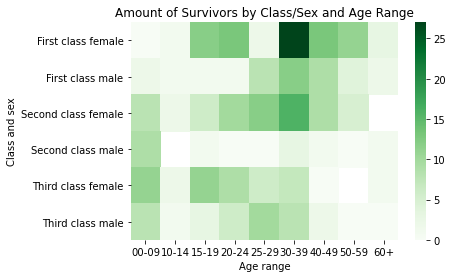

In [77]:
sns.heatmap(tita2,cmap='Greens') 
plt.title('Amount of Survivors by Class/Sex and Age Range')

Repeating much of the above code but with the average fare for each class/sex age range combination, and then generating that heat map.

In [78]:
tita4=tita['fare'].groupby([tita.class_sex,tita.age_range]).mean()
tita4=tita4.to_frame()
tita4['Class and sex']=list(n[0] for n in tita4.index)
tita4['Age range']=list(n[1] for n in tita4.index)
tita4=tita4.pivot('Class and sex','Age range','fare')

In [79]:
tita4

Age range,00-09,10-14,15-19,20-24,25-29,30-39,40-49,50-59,60+
Class and sex,,,,,,,,,
First class female,151.550000,120.000000,106.502433,121.040062,147.245833,108.146604,102.510269,93.732983,77.736100
First class male,116.704150,120.000000,133.970825,120.599980,64.328531,86.837322,49.284029,59.295000,56.239886
Second class female,30.353650,24.785400,18.416667,24.738264,19.893450,18.667647,25.700000,16.083333,NaN
Second class male,27.306022,NaN,21.675000,27.628817,18.643750,20.136290,19.906250,15.986111,17.625000
Third class female,21.180948,16.034050,12.315283,11.394444,11.399354,17.404688,23.917133,NaN,9.587500
Third class male,27.495833,31.902783,10.515392,8.614544,11.473843,11.429083,9.410000,7.700700,7.378125


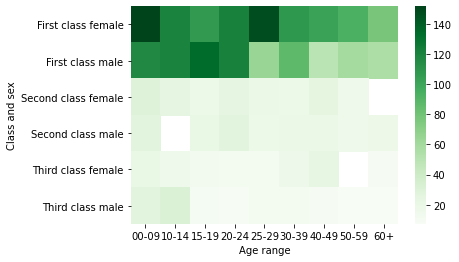

Type:        module
String form: <module 'seaborn' from 'C:\\Users\\natal\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>
File:        c:\users\natal\anaconda3\lib\site-packages\seaborn\__init__.py
Docstring:   <no docstring>


In [80]:
sns.heatmap(tita4,cmap='Greens')
sns?

### 5. Seaborn Pair Plot


Going to use the diamonds dataframe for this one.

In [81]:
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


I'm going to use carat, depth, table, and price as the values/axises, and cut for the 'hue' (so that its comparing correlations/distributions between carat, table, depth, and price of the different cut qualities.) I use sns.pairplot( ), with the first input calling a list of columns in the dataframe for values to reference (ie, dataframe[['column1','column3','column4']]), and the second input defining the hue parameter as the cut column (must be in the beforementioned list.)

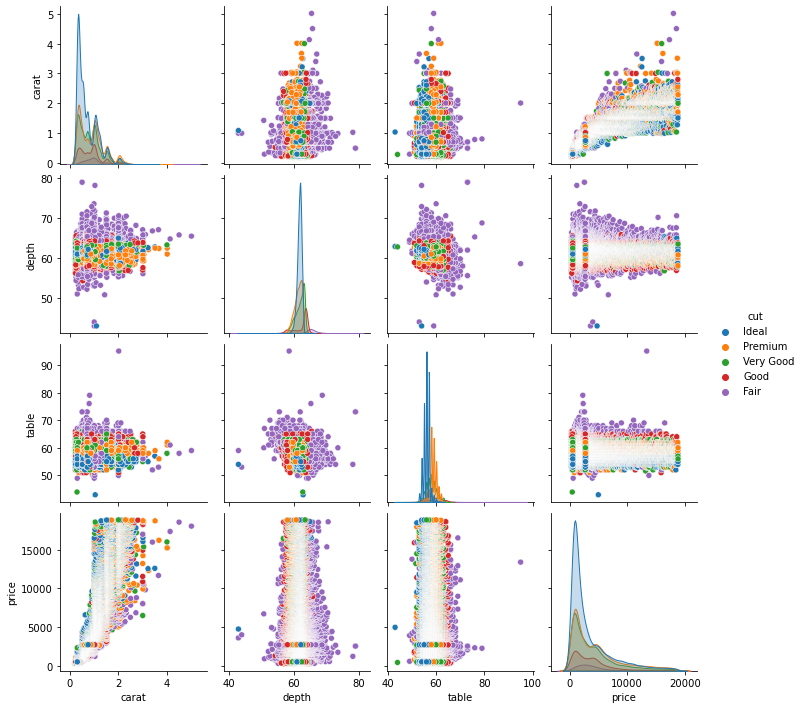

In [82]:
sns.pairplot(dia[['carat','depth','table','price','cut']], hue='cut')

That was a mess. I'm going to query the dataframe so that it only includes entries of the most common clarity and color (SI1 and G respectively) to attempt to remove some of the value variation caused by their variation. It is interesting to note that the most prominent outlier values are almost always of the Fair cut category.

In [83]:
diaq1=dia.query('clarity=="SI1" and color=="G"')

In [84]:
diaq1.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
45461,0.52,Ideal,G,SI1,61.4,56.0,1675,5.18,5.21,3.19
23835,1.51,Ideal,G,SI1,61.6,57.0,11917,7.34,7.31,4.52
27305,2.01,Good,G,SI1,63.9,60.0,17804,7.81,7.75,4.97
43157,0.54,Very Good,G,SI1,63.2,56.0,1389,5.19,5.16,3.27
4949,1.01,Good,G,SI1,64.3,55.0,3733,6.34,6.31,4.07


Now to run the pairplot again and see if there's any significant change.

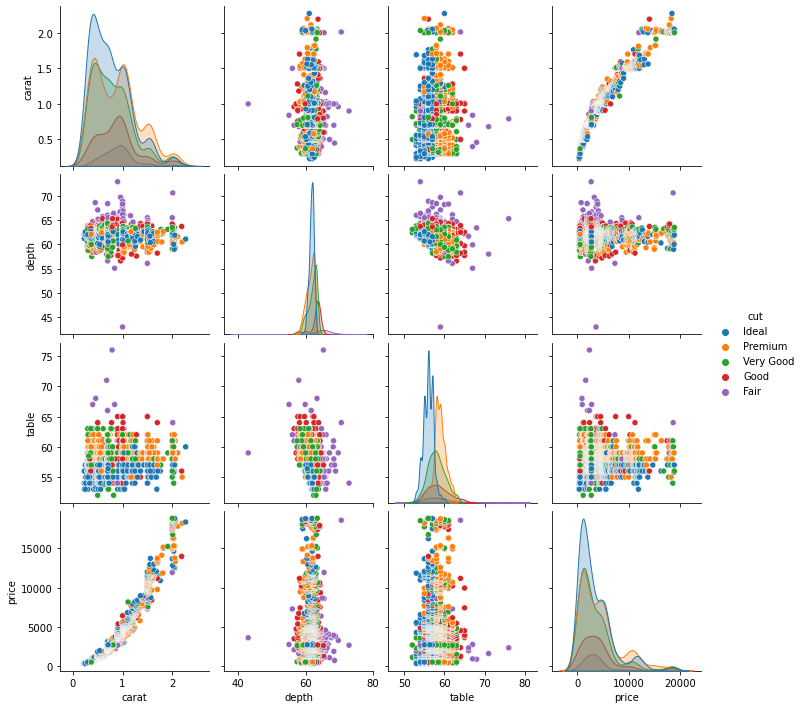

In [85]:
sns.pairplot(diaq1[['carat','depth','table','price','cut']], hue='cut')

This is much better. The distributions are clearer and tighter (and notably the fair column is still the chief perpetrator of outliers). I'm going to make one more pairplot, basically the same except with the hue being color and the dataframe only including entries from the most common clarity and second most common cut (SI1 and Premium). I'm choosing the second most common cut because I ran the pairplot querying for cut==Ideal, and there was just too much data for the plots to be useful, since Ideal has twice as many entries as the next most common cut (Premium). So, I'll use cut=="Premium" so that the data is more easily viewable. 

In [86]:
diaq2=dia.query('clarity=="SI1" and cut=="Premium"')

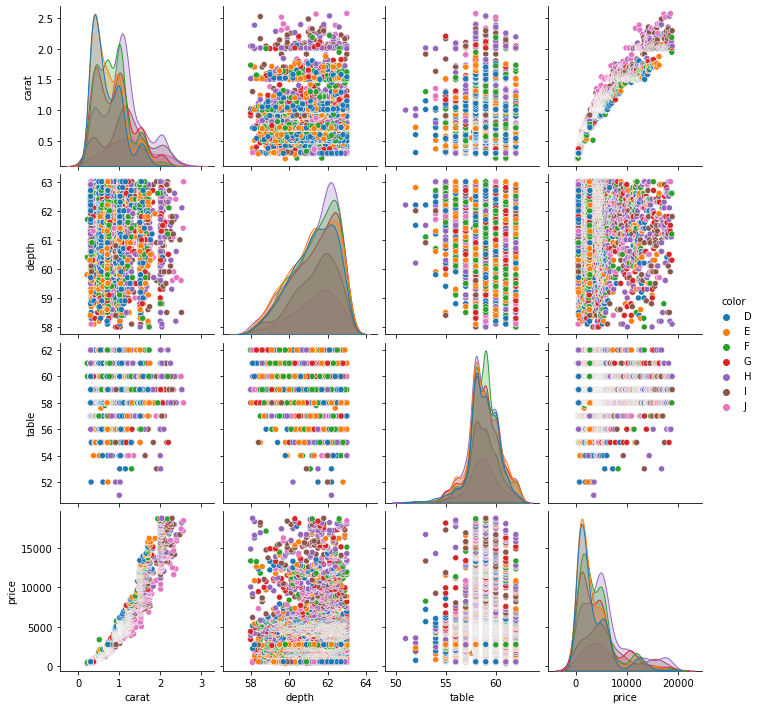

In [87]:
sns.pairplot(diaq2[['carat','depth','table','price','color']], hue='color')

Even with much less data, the plot is still very noisy. It seems color doesn't relate very strongly with the changes in the price, carat, table, and depth columns.